In [1]:
import numpy as np
import matplotlib.pyplot as plt

I'll use gradient descent for Linear Regression.

First, I'll select the sum of squared residuals as the loss function:

$$\sum_{i=0}^{n} (\hat{y}_i - y_i)^2$$

Where $\hat{y}_i$ represent the data points and $y_i$ the predicted values.

Our predicted value is a straight line, so we get:

$$y=mx+b$$

Where $m$ is our slope and $b$ our intercept.

With these we get:

$$\sum_{i=0}^{n} [\hat{y}_i - (b + mx_i)]^2$$

In the code below, I just calculate the term of the swared residual form one data point. I'll explain that later.

In [2]:
def squared_residuals(pair, b, m):
    return (pair[1] - (b + m*pair[0]))**2

To find the optimal values, we want to minimize our  loss function. To do so, using gradient descent, we calculate the gradient.

Given a two variable function $f(x,y)$, the gradient is:

$$\vec{\nabla} f = \left(\frac{\partial{f}}{\partial{x}}, \frac{\partial{f}}{\partial{y}} \right)$$

To aproximate numerically the derivatives, we will use finite differences:

$$\frac{\partial{f}}{\partial{x}} = \frac{f(x+\Delta h, y) - f(x-\Delta h, y)}{2\Delta h} + O(h^2)$$
$$\frac{\partial{f}}{\partial{y}} = \frac{f(x, y+\Delta h) - f(x, y-\Delta h)}{2\Delta h} + O(h^2)$$

Where $\Delta h$ is the step and $O(h^2)$ the error.

I use central differences because that give us better aproximations than forward or backward differences and our function is $C^{\infty}$ and do not oscilate, so we won't have mayor difficulties.

In [3]:
def gradient(func, pair, step, b, m):
    derivate_b = (func(pair, b + step, m) - func(pair, b - step, m))/(2*step)
    derivate_m = (func(pair, b, m  + step) - func(pair, b, m - step))/(2*step)
    return [derivate_m, derivate_b]

Now, what really matters:

The gradient descent algorithm looks to minimize the loss function. To do so, it iterates through values to find the minimum of such function.

The minimun or maximun of a multivariable function is where $\vec{\nabla} f = (0,0)$.

We know for sure that our loss function

$$L(b,m) = \sum_{i=0}^{n} [\hat{y}_i - (b + mx_i)]^2$$

has a minimum because is a quadratic equation and the coefficient of his higher order term is possitive.

So, we need to find where his gradient is zero.

To do so, first we calculate the gradient given an arbitrary intercept $b_0$ and an arbitrary slope $m_0$

$$ \vec{\nabla} L(b_0, m_0) = (g_b^0, g_m^0)$$

Then we multiply our gradient by an arbitrary small value, called learn rate ($l_r$), to get the step size(s) of each variable (slope and intercept)

$$s_b =  g_{b_0}\times l_r$$
$$s_m =  g_{m_0}\times l_r$$

The new values of our slope and intercept will be:

$$m_1 = m_0 - s_m$$
$$b_1 = b_0 - s_b$$

Then we calculate the new gradient with the new slope and intercept and so on, until the step size gets really small. How much is an hyperparameter that we can adjust.

So, our values are:

$$ m_i = m_{i-1} - l_r \nabla L_m(b_{i-1}, m_{i-1}) $$
$$ b_i = b_{i-1} - l_r \nabla L_b(b_{i-1}, m_{i-1}) $$

Also notice that the derivative operator is linear. That's imortant, because our loss function is a sum of multiple terms, and we can calculate its derivative easily by calculating the derivative at each point and then adding them all togheter:

$$ \vec{\nabla} L = \left(\frac{\partial}{\partial m}\sum_{i=0}^{n} [\hat{y}_i - (b + mx_i)]^2,\frac{\partial}{\partial b}\sum_{i=0}^{n} [\hat{y}_i - (b + mx_i)]^2\right) $$
$$ \vec{\nabla} L = \left(\sum_{i=0}^{n} \frac{\partial}{\partial m}[\hat{y}_i - (b + mx_i)]^2,\sum_{i=0}^{n} \frac{\partial}{\partial b}[\hat{y}_i - (b + mx_i)]^2\right) $$

In [4]:
def gradient_descent(cost_fucntion, x, y,  b = 0, m = 1, learn_rate = 0.0001, der_step = 0.001, iterations = 10000, limit = 5):
    pairs = tuple(zip(x,y))
    is_gradient_low = True
    iters = 0
    while (is_gradient_low) and (iters < iterations):
        grad = np.array([0,0])
        for pair in pairs:
            grad = grad + np.array(gradient(cost_fucntion, pair, der_step, b, m))
        step_size_m = grad[0]*learn_rate
        step_size_b = grad[1]*learn_rate
        m = m - step_size_m
        b = b - step_size_b
        if (np.abs(step_size_b) < learn_rate**limit) and (np.abs(step_size_m) < learn_rate**limit):
            is_gradient_low = False
        iters += 1
    return [m, b]

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_1 = LinearRegression()

In [6]:
x = [5, 15, 25, 35, 45, 55]
y = [5, 20, 14, 32, 22, 38]

grad = gradient_descent(squared_residuals, x, y, 0, 1, learn_rate=0.0001, iterations=100000)
print('My code:',grad)
#######################################################
mod = model.fit(np.array(x).reshape(-1,1), np.array(y))
inter = mod.intercept_
coef = mod.coef_[0]
print('scikit-learn:',coef, inter)

My code: [0.5400000000001776, 5.633333333326306]
scikit-learn: 0.5400000000000001 5.633333333333329


In [7]:
x_1 = [0.5, 2.3, 2.9]
y_1 = [1.4, 1.9, 3.2]

grad_1 = gradient_descent(squared_residuals, x_1, y_1, 0, 1, learn_rate=0.01)
print('My code:', grad_1)
#########################################################
mod_1 = model_1.fit(np.array(x_1).reshape(-1,1), np.array(y_1))
inter_1 = mod_1.intercept_
coef_1 = mod_1.coef_[0]
print('scikit-learn',coef_1, inter_1)

My code: [0.6410256447094954, 0.9487179400715373]
scikit-learn 0.6410256410256411 0.9487179487179487


In [8]:
y_ml = []
y_mine = []
for i in x:
    y_ml.append(coef*i + inter)
    y_mine.append(grad[0]*i + grad[1])

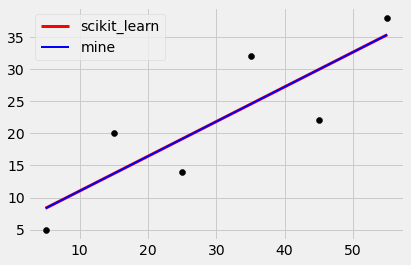

In [9]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
plt.plot(x,y_ml,color='red', linewidth = 3, label='scikit_learn')
plt.plot(x,y_mine,color='b', linewidth=2, label='mine')
plt.legend()

In [10]:
y_ml_1 = []
y_mine_1 = []
for i in x_1:
    y_ml_1.append(coef_1*i + inter_1)
    y_mine_1.append(grad_1[0]*i + grad_1[1])

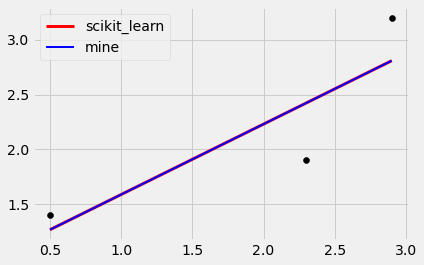

In [11]:
plt.style.use('fivethirtyeight')
plt.scatter(x_1, y_1, color='black')
plt.plot(x_1,y_ml_1,color='red', linewidth = 3, label='scikit_learn')
plt.plot(x_1,y_mine_1,color='b', linewidth=2, label='mine')
plt.legend()